**TODO**:
* Write up LQR
* What to do if some DOF are implicit? That is, if sensors measure only one variable, but not all?

# 1. Stability Of Dynamical System with No Input

### Discrete Case
Consider a multivariate discrete dynamical system

$$x_{t+1} = M x_t$$

We want to determine if this system is stable. After n iterations, the system will evolve to the state $x_n = M^n x_1$. If $M$ is diagonalizable, this is equivalent to $x_n = U^T D^n U x_1$. The dynamics is stable, if no diagonal entry explodes over time, namely

$$\lim_{n \rightarrow \infty} D_{ii}^n = \lim_{n \rightarrow \infty} \lambda_i^n = \lim_{n \rightarrow \infty} r_i^n e^{j\phi_i n} < \infty, \forall i$$

This expression holds if the spectral radius is smaller than 1
$$\rho(M) = \max_i |\lambda_i| = \max_i r_i < 1$$

### Continuous case

In this case the the dynamics can be written as 

$$\dot{x} = Ax$$

By applying diagonalization $A = U^T D U$ and selecting $z = Ux$, the equation can be integrated to yield

$$z_i(t) = ke^{\lambda_i t}$$

Same as before, stability can be ensured if the exponent does not explode, namely, if

$$\mathbb{Re}\{\lambda_i\} < 0$$

### Equivalence

The continuous criterion can be shown to be equivalent to the limit of the discrete criterion. Using first order time-difference, the continuous equation can be written as

$$x(t+dt) = (I + Adt)x(t) = Mx(t)$$

We will use the diagonalization of $A$ to find the diagonalization of $M$

$$M = I + Adt = I + U^T D U dt = U^T U + U^T D U dt = U^T (I + Ddt) U$$

Thus, we find the relationship between eigenvalues

$$\lambda^M_i = 1 + \lambda^A_i dt$$

And can find what we need from the absolute value of $\lambda_M$

$$|\lambda^M_i| = (1 + \mathbb{Re}\{\lambda^A_i\} dt)^2 + (\mathbb{Im}\{\lambda^A_i\} dt)^2 = 1 + 2\mathbb{Re}\{\lambda^A_i\} dt + O(dt^2)$$

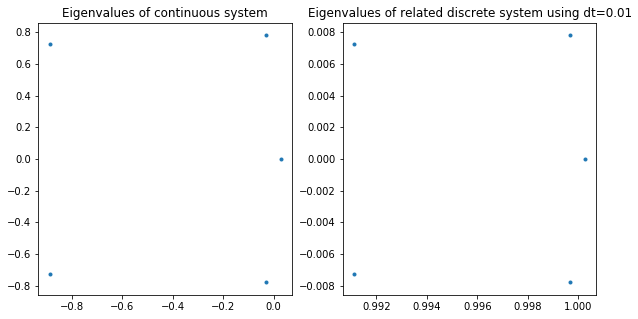

In [14]:
import numpy as np
import matplotlib.pyplot as plt

DIM = 5
DT = 0.01

A = np.random.uniform(-1, 1, DIM**2).reshape((DIM,DIM))
e,v = np.linalg.eig(A)

A_DISCR = A * DT + np.diag(np.ones(DIM))
ed,vd = np.linalg.eig(A_DISCR)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(np.real(e), np.imag(e), '.')
ax[1].plot(np.real(ed), np.imag(ed), '.')
ax[0].set_title("Eigenvalues of continuous system")
ax[1].set_title("Eigenvalues of related discrete system using dt=" + str(DT))
plt.show()

# 2. Stability Of Closed-Loop System with No Input

Task: Select linear feedback to achieve some desired properties

$$\dot{x} = Ax + Bu = Ax - BKx = (A-BK)x$$

**Theorem**: The following are equivalent:
* System is controllable: $rank(B; AB; A^2B; ...; A^{n-1} B) = n$, where $n = dim(x)$
* Arbitrary eigenvalue placement: $\exists K$, s.t, $\{e_i\} = eig(A-BK), \forall \{e_i\}$
* Given right input, all points of the domain are reachable by $x$

Note that magnitude of optimal $K$ gigantic, which may be unrealistic

**Stabilizability**: Even if system is not fully controllable, of interest is if it is controllable in the dimensions where it is unstable or weakly stable.

Original eigenvalues were
 [[-1.55993295+0.j        ]
 [-0.90186128+0.j        ]
 [-0.05295483-0.92408889j]
 [-0.05295483+0.92408889j]
 [ 0.82484226+0.j        ]]
----------------------------- 
Testing if matrix is controllable:  True
Singular values of controllability:  [10.40286294  3.54037571  2.61848182  2.06831405  1.61429036]
----------------------------- 
Target eigenvalues were
 [[-0.7+0.j]
 [-0.5-1.j]
 [-0.5+1.j]
 [-0.2-1.j]
 [-0.2+1.j]]
Resulting eigenvalues were
 [[-0.7+0.j]
 [-0.5-1.j]
 [-0.5+1.j]
 [-0.2-1.j]
 [-0.2+1.j]]
Norms of the matices are 2.911682186623946 2.776154848303405 8.127240809846057


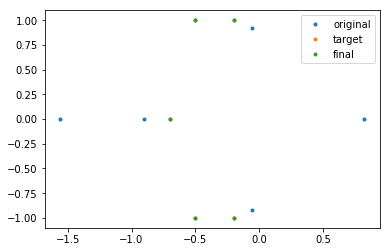

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import control

DIM = 5

# Construct arbitrary matrix A and find its eigenvalues
A = np.random.uniform(-1, 1, DIM**2).reshape((DIM,DIM))
e1,v1 = np.linalg.eig(A)
print("Original eigenvalues were\n", np.sort(e1)[:,None])

# Now assume that our Dynamical system is of the form x' = Ax + Bu, where u is input
B = np.random.uniform(-1, 1, DIM**2).reshape((DIM,DIM))

# Check if the system is controllable
C = control.ctrb(A, B)
print("----------------------------- ")
print("Testing if matrix is controllable: ", np.linalg.matrix_rank(C) == DIM)
print("Singular values of controllability: ", np.linalg.svd(C, compute_uv=False))
print("----------------------------- ")

# We want to find a feedback matrix K, such that the eigenvalues are placed at arbitrary new locations
e_target = np.array([-0.7, -0.5 + 1j, -0.5 - 1j, -0.2 + 1j, -0.2 - 1j])
print("Target eigenvalues were\n", np.sort(e_target)[:,None])

fsf1 = scipy.signal.place_poles(A, B, e_target)
K = fsf1.gain_matrix
Anew = A - B.dot(K)
e2,v2 = np.linalg.eig(Anew)
print("Resulting eigenvalues were\n", np.sort(e2)[:,None])

print("Norms of the matices are", np.linalg.norm(A, np.inf), np.linalg.norm(B, np.inf), np.linalg.norm(K, np.inf))

plt.figure()
plt.plot(np.real(e1), np.imag(e1), '.', label='original')
plt.plot(np.real(e_target), np.imag(e_target), '.', label='target')
plt.plot(np.real(e2), np.imag(e2), '.', label='final')
plt.legend()
plt.show()